In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv("loan_approval_data.csv")

In [42]:
df.head()
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


# Missing Values

In [43]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns


In [44]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [45]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [46]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy= "mean")
df[numerical_cols]= num_imp.fit_transform(df[numerical_cols])

catg_imp = SimpleImputer(strategy= "most_frequent")
df[categorical_cols]= catg_imp.fit_transform(df[categorical_cols])



In [47]:
df.head()
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA

Text(0.5, 1.0, 'Is Loan approved')

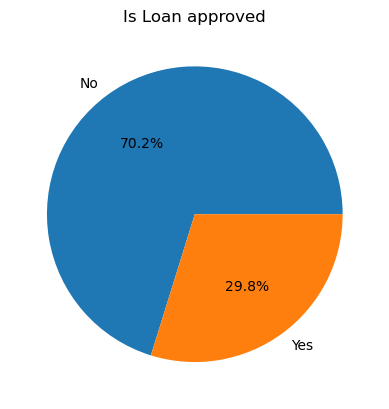

In [48]:
class_count= df["Loan_Approved"].value_counts()
plt.pie(class_count, labels= ["No","Yes"] ,autopct="%1.1f%%")
plt.title("Is Loan approved")

[Text(0, 0, '621'), Text(0, 0, '379')]

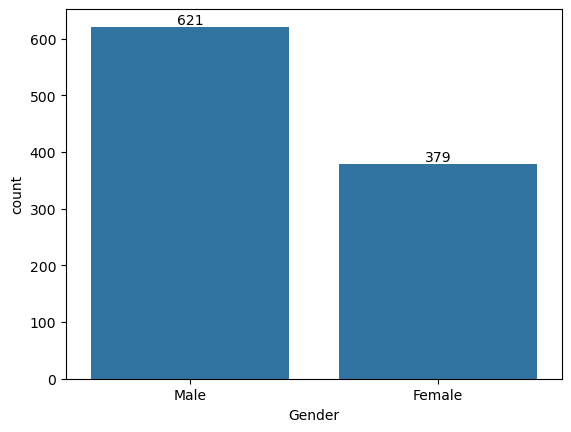

In [49]:
gender_cnt = df["Gender"].value_counts()
ax =sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])

[Text(0, 0, '722'), Text(0, 0, '278')]

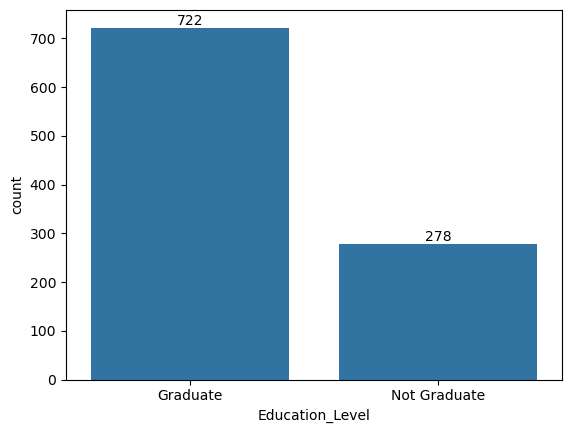

In [50]:
edu_cnt = df["Education_Level"].value_counts()
ax =sns.barplot(edu_cnt)
ax.bar_label(ax.containers[0])

[Text(0, 0, '515'), Text(0, 0, '213'), Text(0, 0, '182'), Text(0, 0, '90')]

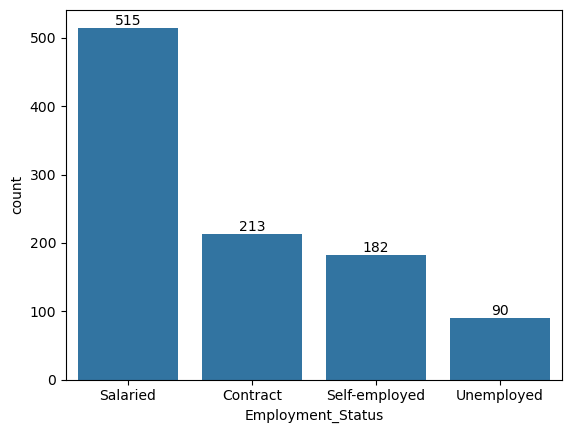

In [51]:
emp_cnt = df["Employment_Status"].value_counts()
ax =sns.barplot(emp_cnt)
ax.bar_label(ax.containers[0])

[Text(0, 0, '517'), Text(0, 0, '294'), Text(0, 0, '189')]

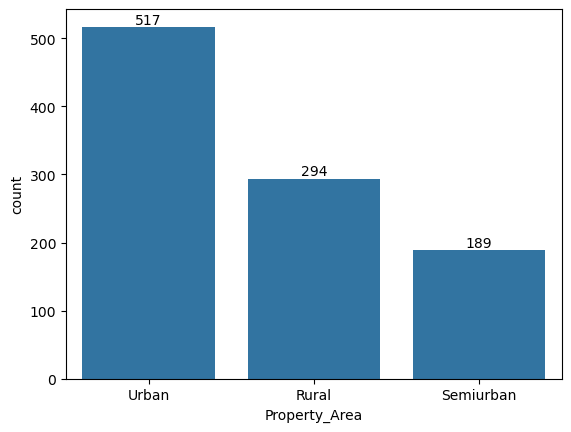

In [52]:
prop_cnt = df["Property_Area"].value_counts()
ax =sns.barplot(prop_cnt)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

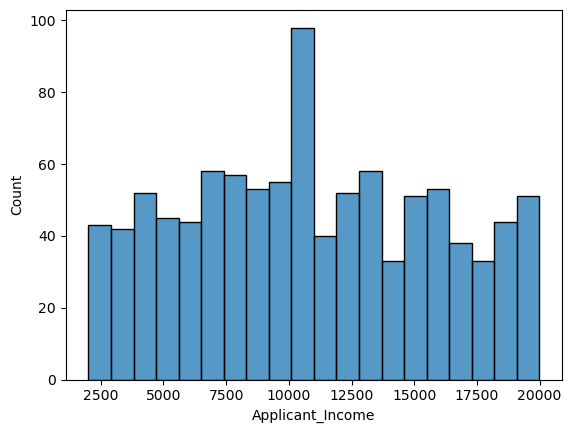

In [53]:
sns.histplot(data =df,x="Applicant_Income", bins=20)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

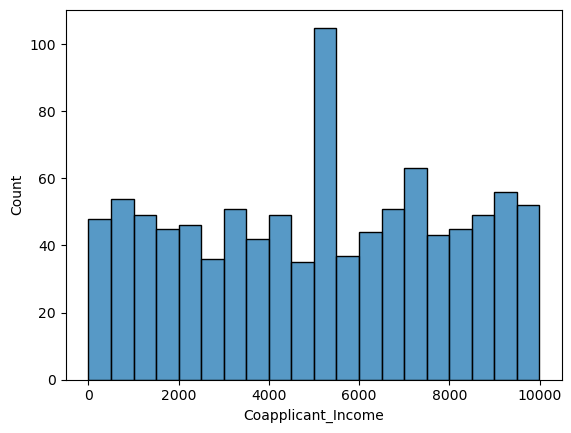

In [54]:
sns.histplot(data =df,x="Coapplicant_Income", bins=20)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

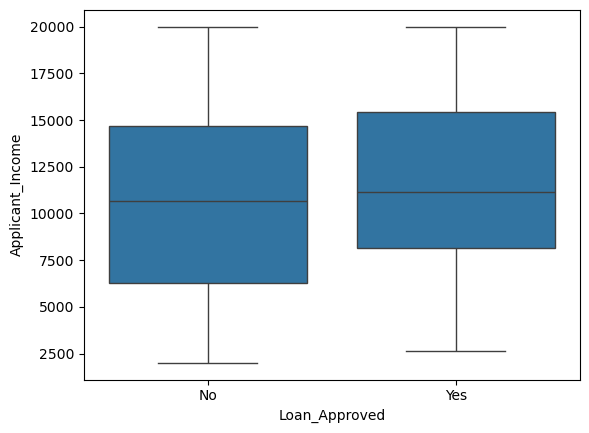

In [55]:
sns.boxplot(data =df,y="Applicant_Income", x ="Loan_Approved")

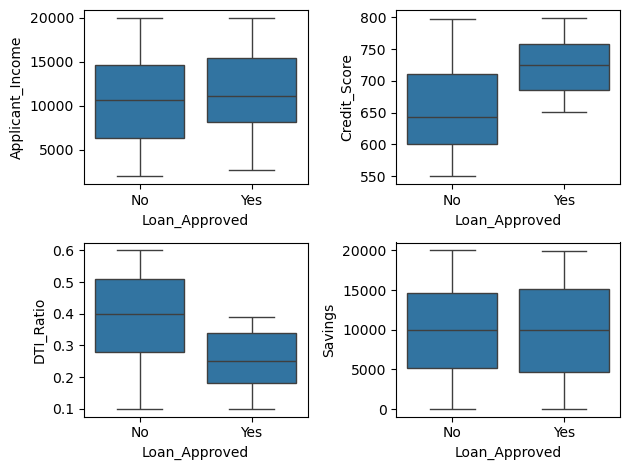

In [56]:
fig,axes = plt.subplots(2,2)
sns.boxplot(ax = axes[0,0],data =df,y="Applicant_Income", x ="Loan_Approved")
sns.boxplot(ax = axes[0,1],data =df,y="Credit_Score", x ="Loan_Approved")
sns.boxplot(ax = axes[1,0],data =df,y="DTI_Ratio", x ="Loan_Approved")
sns.boxplot(ax = axes[1,1],data =df,y="Savings", x ="Loan_Approved")
plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

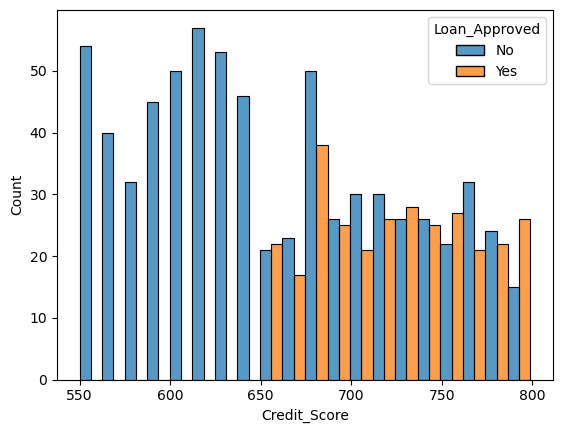

In [57]:
sns.histplot(data =df,x="Credit_Score", hue ="Loan_Approved", bins=20, multiple = "dodge")

<Axes: xlabel='Applicant_Income', ylabel='Count'>

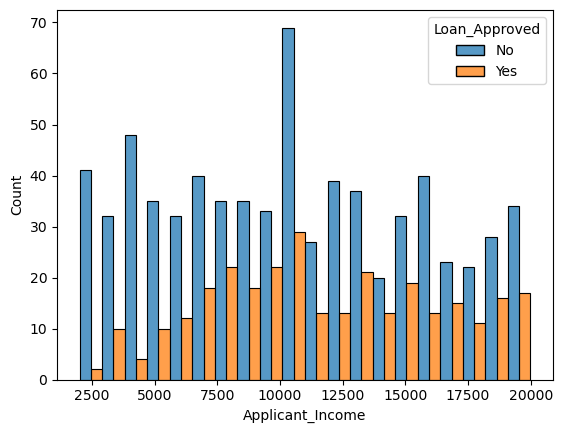

In [58]:
sns.histplot(data =df,x="Applicant_Income", hue ="Loan_Approved", bins=20, multiple = "dodge")

In [59]:
df = df.drop("Applicant_ID", axis =1)

In [60]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


#  Feature Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])


In [62]:
df.head()
df.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Employment_Status', 'Age',
       'Marital_Status', 'Dependents', 'Credit_Score', 'Existing_Loans',
       'DTI_Ratio', 'Savings', 'Collateral_Value', 'Loan_Amount', 'Loan_Term',
       'Loan_Purpose', 'Property_Area', 'Education_Level', 'Gender',
       'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [63]:
cols = ["Employment_Status","Marital_Status","Loan_Purpose", "Property_Area","Gender","Employer_Category"]

ohe= OneHotEncoder(drop="first",sparse_output=False, handle_unknown="ignore")

encoded = ohe.fit_transform(df[cols])

encoded_df= pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index= df.index)

df = pd.concat([df.drop(columns=cols),encoded_df],axis=1)


In [64]:
encoded_df
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int32  
 12  Loan_Approved        

 # Correlation Heatmap

<Axes: >

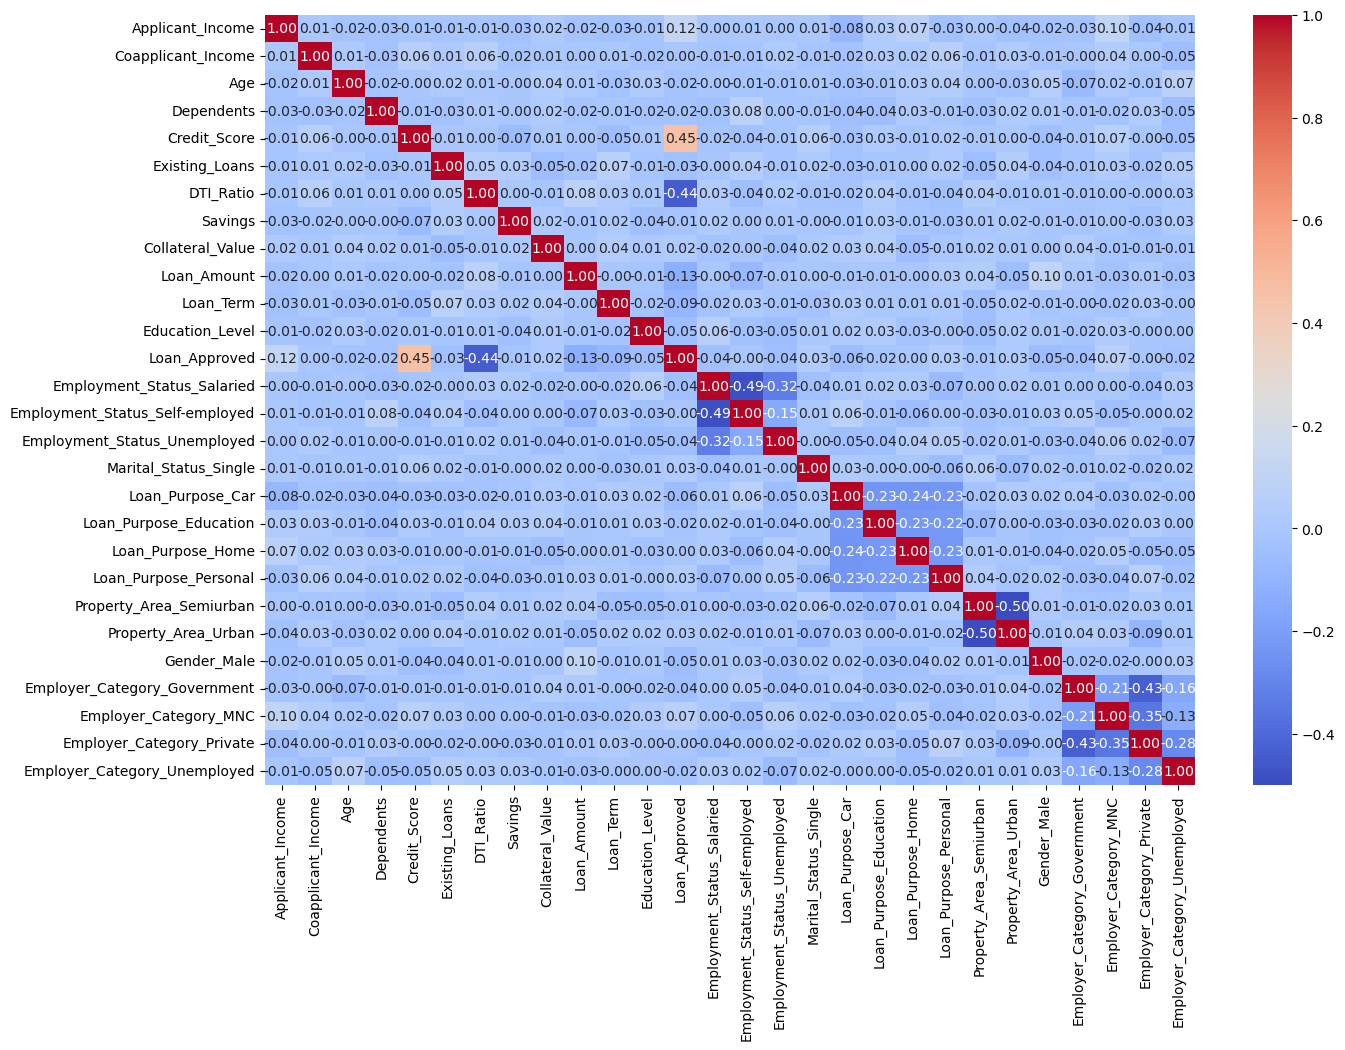

In [65]:
num_cols = df.select_dtypes(include = "number")
corr_matrix = num_cols.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot = True, fmt=".2f", cmap="coolwarm")

In [66]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 

# Train-Test-Split + Feature Scaling

In [67]:
X = df.drop("Loan_Approved", axis=1)
y = df["Loan_Approved"]

In [68]:
x_train, x_test ,y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [70]:
x_train_scaled
x_test_scaled

array([[ 0.42610546,  0.55091079,  1.19037073, ..., -0.41388776,
         1.16316   , -0.30723158],
       [ 1.00971366,  0.58995935,  0.18392964, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.67557096, -0.54558674,  1.09887608, ..., -0.41388776,
         1.16316   , -0.30723158],
       ...,
       [-0.67980585, -0.10106072,  1.28186537, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.37650705, -0.97825874, -0.54802752, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [-0.73647272, -1.24497436,  0.73289751, ..., -0.41388776,
         1.16316   , -0.30723158]])

# Train & Evaluate Models

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(x_train_scaled,y_train)
y_pred = log_model.predict(x_test_scaled)
print("Logistic Regression Model ")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))


Logistic Regression Model 
Precision:  0.7833333333333333
Accuracy:  0.865
Recall:  0.7704918032786885
F1_score:  0.7768595041322314
Confusion_matrix:  [[126  13]
 [ 14  47]]


In [72]:
# Knn
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors =5)
knn_model.fit(x_train_scaled,y_train)
y_pred = knn_model.predict(x_test_scaled)
print("Knn Model ")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))



Knn Model 
Precision:  0.6274509803921569
Accuracy:  0.76
Recall:  0.5245901639344263
F1_score:  0.5714285714285714
Confusion_matrix:  [[120  19]
 [ 29  32]]


In [73]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train_scaled,y_train)
y_pred = nb_model.predict(x_test_scaled)
print(" Naive Bayes  Model ")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))



 Naive Bayes  Model 
Precision:  0.8035714285714286
Accuracy:  0.865
Recall:  0.7377049180327869
F1_score:  0.7692307692307693
Confusion_matrix:  [[128  11]
 [ 16  45]]


###  Best model on the basis of precision => Naive Bayes

# Feature Engineering

In [80]:


df["DTI_Ratio_sq"]= df["DTI_Ratio"]**2
df["Credit_Score_sq"]= df["Credit_Score"]**2

#df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

X=df.drop(columns= ["Loan_Approved","Credit_Score","DTI_Ratio" ], axis =1)
y = df["Loan_Approved"]


x_train, x_test ,y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()

x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [81]:
x_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,...,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq
29,5890.000000,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000
535,4779.000000,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000
695,10852.571579,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000
557,2384.000000,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000
836,5228.000000,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187


In [82]:
log_model = LogisticRegression()
log_model.fit(x_train_scaled,y_train)
y_pred = log_model.predict(x_test_scaled)
print("Logistic Regression Model ")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))


Logistic Regression Model 
Precision:  0.7903225806451613
Accuracy:  0.875
Recall:  0.8032786885245902
F1_score:  0.7967479674796748
Confusion_matrix:  [[126  13]
 [ 12  49]]


In [83]:
knn_model = KNeighborsClassifier(n_neighbors =5)
knn_model.fit(x_train_scaled,y_train)
y_pred = knn_model.predict(x_test_scaled)
print("Knn Model ")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))


Knn Model 
Precision:  0.62
Accuracy:  0.755
Recall:  0.5081967213114754
F1_score:  0.5585585585585585
Confusion_matrix:  [[120  19]
 [ 30  31]]


In [84]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled,y_train)
y_pred = nb_model.predict(x_test_scaled)
print(" Naive Bayes  Model ")
print("Precision: ", precision_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1_score: ", f1_score(y_test, y_pred))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred))



 Naive Bayes  Model 
Precision:  0.7833333333333333
Accuracy:  0.865
Recall:  0.7704918032786885
F1_score:  0.7768595041322314
Confusion_matrix:  [[126  13]
 [ 14  47]]
